# Minimos Cuadrados

Supongamos que se necesita resolver un sistema de ecuaciones $\boldsymbol{A}\boldsymbol{x}=\boldsymbol{y}$ sobre-determinado.

En este caso, contamos con mayor numero de ecuaciones que inconitas. Por lo tanto, la matriz $\boldsymbol{A}$ no es cuadrada y por consiguiente, tiene $m$ filas y $n$ columnas para $m>n$.

En vez de resolver el sistema de ecuaciones $\boldsymbol{A}\boldsymbol{x}=\boldsymbol{y}$, trataremos de encontrar una aproximación por mínimos cuadrados:

$\operatorname{min} \frac{1}{2}|\boldsymbol{A}\boldsymbol{x}-\boldsymbol{y}|^2$.

Ahora, tenemos que comprobar que $\boldsymbol{A}$ es de rango $n$ y por lo tanto, existen tantas ecuaciones linealmente independientes como incógnitas y por lo tanto existe una solución 


## Solución de Mínimos Cuadrados

Si el rango de $\boldsymbol{A}$ es $n$, entonces la matriz $\boldsymbol{A}^T \boldsymbol{A}$ es una matriz $n\times n$ cuya inversa existe.

Por lo tanto, la solución del problema está dada por:

$\boldsymbol{x}=(\boldsymbol{A}^T \boldsymbol{A})^{-1}\boldsymbol{A}^T\boldsymbol{y}$

En este caso, la matriz $\boldsymbol{A}^{\dagger}=(\boldsymbol{A}^T \boldsymbol{A})^{-1}\boldsymbol{A}^T$ es la pseudo-inversa de $\boldsymbol{A}$, ya que $\boldsymbol{A}^{\dagger}\boldsymbol{A}=I$

In [3]:
using LinearAlgebra;

A=rand(Float64, (10, 3))

10×3 Matrix{Float64}:
 0.192188  0.08406   0.475453
 0.140014  0.809511  0.53945
 0.153687  0.724798  0.983194
 0.106169  0.740487  0.69075
 0.400423  0.266159  0.975955
 0.121343  0.772609  0.581855
 0.565839  0.827569  0.404619
 0.42337   0.660791  0.757504
 0.546069  0.323537  0.548615
 0.109804  0.895713  0.624503

In [4]:
print("El rango de la matriz A es ",rank(A))

El rango de la matriz A es 3

In [5]:
inv(transpose(A)*A)*transpose(A)

3×10 Matrix{Float64}:
  0.0580283  -0.188296  -0.529112   …  0.336322     0.848001   -0.343484
 -0.309027    0.342346  -0.0885994     0.00385254  -0.166806    0.361012
  0.342568   -0.104799   0.485608      0.0313401   -0.0616474  -0.0438026

In [6]:
pinv(A)

3×10 Matrix{Float64}:
  0.0580283  -0.188296  -0.529112   …  0.336322     0.848001   -0.343484
 -0.309027    0.342346  -0.0885994     0.00385254  -0.166806    0.361012
  0.342568   -0.104799   0.485608      0.0313401   -0.0616474  -0.0438026

calculamos la pseudo-inversa mediante la función pinv, lo cual nos permite comprobar que aunque $A$ no es una matriz cuadrada, la seudoinversa actua de la misma forma que la inversa.  

In [7]:
pinv(A)*A ≈ Diagonal(ones(3))

true

In [8]:
pinv(A)*A

3×3 Matrix{Float64}:
  1.0           0.0           4.44089e-16
  6.93889e-17   1.0          -1.11022e-16
 -2.94903e-17  -3.88578e-16   1.0

In [9]:
norm(A)

3.1920005361096506

In [11]:
sqrt(sum([a^2 for a in A]))

2.913859525016537

In [10]:
sqrt(sum([a^2 for a in pinv(A)]))

2.153274731275054

Ahora podemos calcular el numero de condicionamiento $cond(A)=||A||\times ||A^{\dagger}|| $, donde $||\cdot||$ es la norma de la matriz no cuadrada.

In [11]:
norm(A)*norm(pinv(A))

6.873254096621336

# 2) Ejercicios 

2.1) Resolver el siguiente sistema de ecuaciones lineales usando el método de minimos cuadrados: $\boldsymbol{A}\boldsymbol{x}=\boldsymbol{y}$. Verifique el rango, condicionamiento y existencia de la pseudo-inversa.

$\boldsymbol{A}=\begin{bmatrix} 2 & 4 & 2\\
                                1 & 1 & 3\\
                                4 & 2 & 2\\
                                2 & 5 & 3\\
                                2 & 1 & 1\\
                \end{bmatrix}$, 
$\boldsymbol{y}=\begin{bmatrix} 82\\
                                38\\
                                118\\
                                91\\
                                59\\
                \end{bmatrix}$

2.2)Use un sistema de ecuaciones para predecir el consumo de gasolina de un vehiculo dependiendo del peso, desplazamiento, caballos de fuerza y aceleración de este. Descargue los datos desde :

https://archive.ics.uci.edu/ml/datasets/auto+mpg

In [12]:
 A=[2 4 2;
    1 1 3;
    4 2 2;
    2 5 3;
    2 1 1];
y=[82;
   38;
   118;
   91;
   59];

In [13]:
rank(A),cond(A)

(3, 4.851183685149085)

In [14]:
x=pinv(A)*y

3-element Vector{Float64}:
 24.999999999999996
  6.999999999999996
  2.000000000000012

In [18]:
for i in zip(A*x,y)
    println(i)
end

(82.0, 82)
(38.00000000000003, 38)
(118.0, 118)
(91.0, 91)
(59.0, 59)


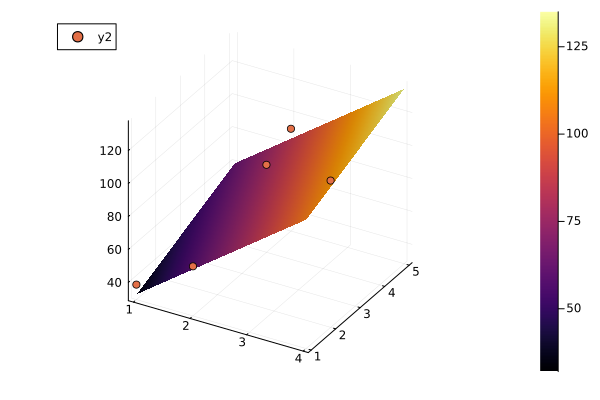

In [22]:
using Plots

function lin_fun(x::Vector,w::Vector)
  return x[1]*w[1]+x[2]*w[2]
end

a1 =range(minimum(A[:,1]), stop = maximum(A[:,1]), length = 100)
a2 =range(minimum(A[:,2]), stop = maximum(A[:,2]), length = 100)

surface(a1, a2, (a1, a2) -> lin_fun([a1,a2],x))
scatter3d!(A[:,1],A[:,2],y)

In [1]:
import Pkg; 
Pkg.add("CSV");
Pkg.add("DataFrames");

using Downloads;
using DelimitedFiles;
using DataFrames;

http_response=Downloads.download("https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")

   Resolving package versions...


  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


   Resolving package versions...


  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


"/var/folders/wd/0sm_658d23ldnfyfjn6y4s6m0000gn/T/jl_18fMxKNAVa"

In [3]:
raw_data=readdlm(http_response, '\t', '\n');
data=string.(raw_data[:,1]);
mat=split.(data);

In [4]:
mat=[ [ tryparse(Float64,x) for x in mat[i]] for i in range(1,length(mat))];
mat=transpose(reduce(hcat,mat));

In [6]:
A=hcat(mat[:,1],mat[:,3],mat[:,6]);
y=mat[:,2];

In [8]:
using LinearAlgebra

rank(A),cond(A)

(3, 73.70850447597451)

In [9]:
x=pinv(A)*y

3-element Vector{Float64}:
 0.026380410184665415
 0.018574908277214162
 0.07850480801976246

In [10]:
norm(A*x-y)

11.367382870824088

In [11]:
using Statistics

cor(A)

3×3 Matrix{Float64}:
  1.0       -0.804203   0.420289
 -0.804203   1.0       -0.543684
  0.420289  -0.543684   1.0

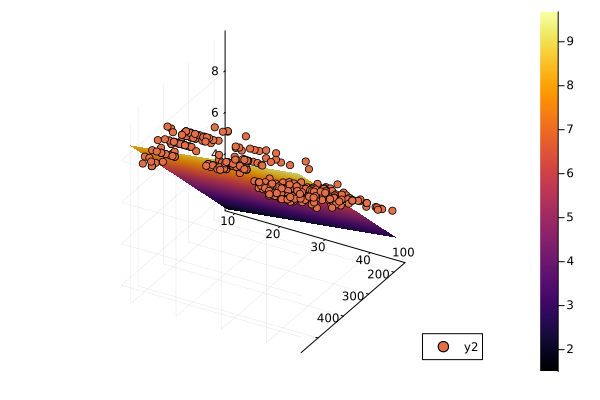

In [14]:
using Plots

a1 =range(minimum(A[:,1]), stop = maximum(A[:,1]), length = 100)
a2 =range(minimum(A[:,2]), stop = maximum(A[:,2]), length = 100)

function lin_fun(x::Vector,w::Vector)
    return x[1]*w[1]+x[2]*w[2]
  end
  
surface(a1, a2, (a1, a2) -> lin_fun([a1,a2],x),camera=(-30,-30))
scatter3d!(A[:,1],A[:,2],y)

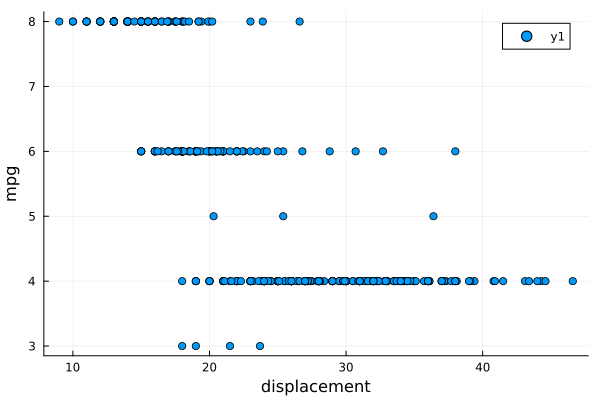

In [215]:
scatter(A[:,1],y)
xlabel!("displacement")
ylabel!("mpg")

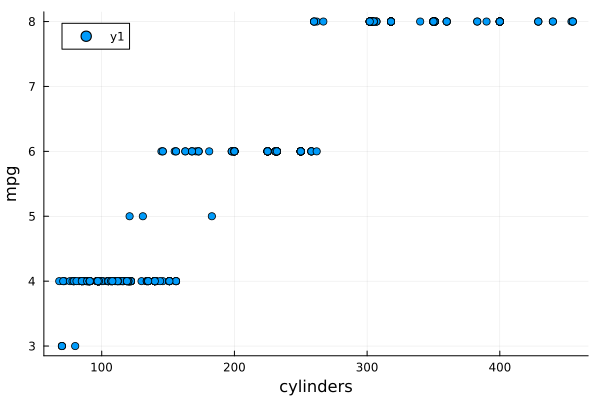

In [216]:
scatter(A[:,2],y)
xlabel!("cylinders")
ylabel!("mpg")

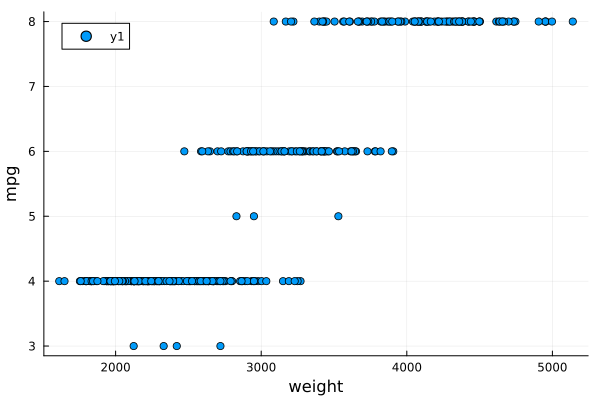

In [217]:
scatter(A[:,3],y)
xlabel!("weight")
ylabel!("mpg")

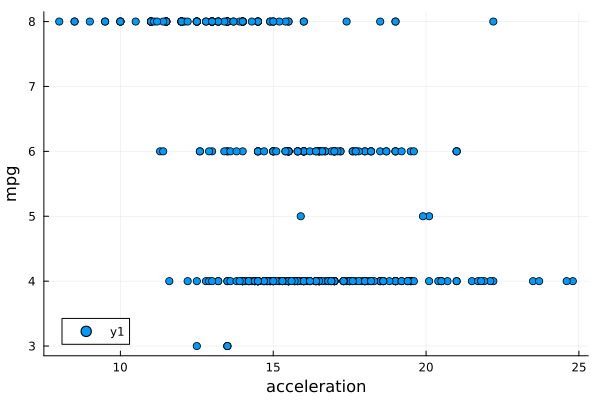

In [218]:
scatter(A[:,4],y)
xlabel!("acceleration")
ylabel!("mpg")